# Imports

In [6]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
import gmaps
from api_keys import g_key
import os
import csv

## Lori's Code Starts Here:

In [7]:
clean_indeed_df = pd.read_csv("CLEAN Indeed Data Set.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'CLEAN Indeed Data Set.csv'

In [ ]:
# Get indexes where name column has value Missing
MissingData = clean_indeed_df[clean_indeed_df["Location"] == "Missing"].index
 
# Delete these row indexes from dataFrame
updated_df = clean_indeed_df.drop(MissingData , inplace=True)

clean_indeed_df

In [ ]:
clean_indeed_df.columns

In [ ]:
#import dataframe that includes lat/lng for states

states_df = pd.read_csv("State_Abbrev_List.csv")

states_df.head()

In [ ]:
#merge dataframes 

merged_df = pd.merge(clean_indeed_df, states_df, on="Location", how="inner")

# merged_df

In [ ]:
#change salary ranges to single values
merged_df["Queried_Salary"].replace({"<80000": "80000", "80000-99999": "99999", "100000-119999":"119999", "120000-139999":"139999", "140000-159999":"159999", ">160000":"160000"}, inplace=True)

merged_df.head()

In [ ]:
# check salary values 

#merged_df["Queried_Salary"].value_counts()

In [ ]:
#change salary data type to float for use in heatmap
merged_df["Queried_Salary"] = merged_df["Queried_Salary"].astype(float, 2)

# merged_df

In [ ]:
merged_df.dtypes

In [ ]:
# Where are the jobs?
# Location and Salary (heat map)

In [ ]:
# configure gmaps

gmaps.configure(api_key = g_key)

In [ ]:
#establish locations variable

locations = merged_df[["Latitude", "Longitude"]]
locations.head()

In [ ]:
#establish weights variable

salary = merged_df["Queried_Salary"]

average_salary = merged_df["Queried_Salary"].mean()

salary_norm = merged_df["Queried_Salary"] / average_salary

salary_norm

# merged_df["Queried_Salary"].value_counts()

In [ ]:
#create heatmap

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=salary_norm, dissipating=False, max_intensity=300, point_radius = 5)

fig.add_layer(heat_layer)

fig

In [ ]:
plt.savefig("Location_vs_Salary.png")

In [ ]:
# scatter plot salary vs cost of living index
x_values = merged_df["Queried_Salary"]
y_values = merged_df["Index"]
plt.bar(x_values,y_values)

plt.title("Does the cost of living affect salary?")
plt.xlabel("Salary")
plt.ylabel("Cost of Living Index")

plt.show()

In [ ]:
plt.savefig("Salary_vs_COLI.png")

In [ ]:
# Are more skills needed for higher salary ranges?
# Bar plot

In [ ]:
locations = merged_df["Queried_Salary"]

skills = merged_df["No_of_Skills"]

In [ ]:
grouped_skills_df = merged_df.groupby("Location").nunique()["No_of_Skills"]

grouped_skills_df.index

In [ ]:
# x_axis = np.arange(len(grouped_skills_df))

plt.figure(figsize=(15, 10))

plt.bar(grouped_skills_df.index, grouped_skills_df, color="blue", alpha=1, align="center")

plt.title("Unique Skills In Each State")
plt.xlabel("States")
plt.ylabel("Number of Unique Skills")

plt.show()

In [ ]:
plt.savefig("Unique_Skills_by_State.png")

## Susana's Code Starts Here

In [28]:
# Read Clean Indeed Dataset and store into Pandas data frame
clean_indeed_df = pd.read_csv("./Indeed Data Set.csv")
clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0.0,0,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,4,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,0.0,0,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,4,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


In [29]:
# Exploring Number of stars after filtering
test = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 100)]
test['No_of_Stars'].value_counts()

4    2813
3     227
5       1
Name: No_of_Stars, dtype: int64

In [30]:
# Checking columns
clean_indeed_df.columns

Index(['Job_Title', 'Queried_Salary', 'Job_Type', 'Skill', 'No_of_Skills',
       'Company', 'No_of_Reviews', 'No_of_Stars', 'Location',
       'Company_Revenue', 'Company_Employees', 'Company_Industry', 'python',
       'sql', 'machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark',
       'java', 'Others', 'CA', 'NY', 'VA', 'TX', 'MA', 'IL', 'WA', 'MD', 'DC',
       'NC', 'Other_states', 'Consulting and Business Services',
       'Internet and Software', 'Banks and Financial Services', 'Health Care',
       'Insurance', 'Other_industries'],
      dtype='object')

In [31]:
# Filtering data to keep those above 500 reviews
# Was going to use this, but decided not to.
indeed_df_500 = clean_indeed_df.loc[(clean_indeed_df['No_of_Reviews'] >= 500)]
indeed_df_500

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
9,Data Scientist,<80000,data_scientist,"['JavaScript', 'Data Mining', 'TS/SCI Clearanc...",6,usajobs.gov,4227.0,4,MO,Missing,...,0,0,0,1,0,0,0,0,0,1
10,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
11,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SPSS', 'Data Analys...",8,The University of Pittsburgh,541.0,4,PA,Missing,...,0,0,0,1,0,0,0,0,0,1
17,Data Scientist,<80000,data_scientist,"['Microsoft SQL Server', 'Data Mining', 'Machi...",12,Deloitte,7197.0,4,VA,Missing,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5701,"Sr. Director, Data Engineering",>160000,data_engineer,"['SOX', 'Machine Learning', 'PCI', 'Leadership...",6,Capital One,6791.0,4,VA,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0
5704,"Senior Data Engineer (Java, Hadoop)",>160000,data_engineer,"['Linux', 'Hive', 'Data Management', 'Hadoop',...",14,JPMorgan Chase,21159.0,4,NJ,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


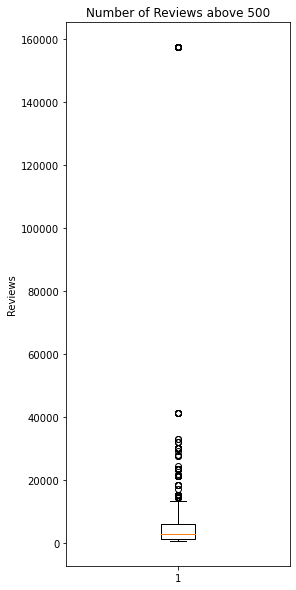

In [32]:
reviews = indeed_df_500['No_of_Reviews']

fig1, ax1 = plt.subplots()
ax1.set_title('Number of Reviews above 500')
ax1.set_ylabel('Reviews')
fig1.set_size_inches(4, 10)
ax1.boxplot(reviews)

# Saving figure
plt.savefig("./Number of Reviews.png")

# Showing image
plt.show()

In [33]:
# What is the distributions of rating
print(indeed_df_500['No_of_Stars'].value_counts())
print(clean_indeed_df['No_of_Stars'].value_counts())

# After this decided to use clean_indeed_df instead of indeed_df_500

4    2069
3     131
5       1
Name: No_of_Stars, dtype: int64
4    3943
0     962
3     587
5     179
2      43
1       1
Name: No_of_Stars, dtype: int64


In [34]:
# Realized there are multiple rows for the same column
clean_indeed_df['Company'].value_counts()

Booz Allen Hamilton                       151
Harnham                                    87
Capgemini                                  84
Facebook                                   65
KPMG LLP                                   64
                                         ... 
Celmatix                                    1
Central California Alliance for Health      1
Softvision                                  1
Lionbridge Technologies                     1
Modern Meadow                               1
Name: Company, Length: 2231, dtype: int64

In [35]:
# New Data Frame to just keep pertinent information for my analysis
new_df_undup = clean_indeed_df.loc[:, ['Queried_Salary', 'Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location', 'Company_Revenue', 
                                 'Company_Employees', 'Company_Industry']]
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3,MO,More than $10B (USD),"10,000+",Health Care
1,<80000,data_scientist,Money Mart Financial Services,0.0,0,TX,Missing,missing,Not Listed
2,<80000,data_scientist,comScore,62.0,4,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,"Less than 10,000",Banks and Financial Services
...,...,...,...,...,...,...,...,...,...
5710,>160000,data_engineer,Intelliswift Software Inc,0.0,0,Missing,Missing,missing,Not Listed
5711,>160000,data_engineer,Jobspring Partners,31.0,4,CA,Missing,missing,Human Resources and Staffing
5712,>160000,data_engineer,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [36]:
# Removing those records that are missing No_of_Stars
new_df_undup = new_df_undup.loc[new_df_undup['No_of_Stars'] != "Missing", :]
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3,MO,More than $10B (USD),"10,000+",Health Care
1,<80000,data_scientist,Money Mart Financial Services,0.0,0,TX,Missing,missing,Not Listed
2,<80000,data_scientist,comScore,62.0,4,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,"Less than 10,000",Banks and Financial Services
...,...,...,...,...,...,...,...,...,...
5710,>160000,data_engineer,Intelliswift Software Inc,0.0,0,Missing,Missing,missing,Not Listed
5711,>160000,data_engineer,Jobspring Partners,31.0,4,CA,Missing,missing,Human Resources and Staffing
5712,>160000,data_engineer,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [37]:
# Removing duplicates across the columns
new_df_undup = new_df_undup.drop_duplicates()

In [38]:
# Checking data types
new_df_undup.dtypes

Queried_Salary        object
Job_Type              object
Company               object
No_of_Reviews        float64
No_of_Stars            int64
Location              object
Company_Revenue       object
Company_Employees     object
Company_Industry      object
dtype: object

In [39]:
# converting No_of_Stars from object to int
# new_df_undup.astype({'No_of_Stars': 'int32'})
new_df_undup["No_of_Stars"] = new_df_undup["No_of_Stars"].astype('float')

<ipython-input-39-5b84488e634a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_undup["No_of_Stars"] = new_df_undup["No_of_Stars"].astype('float')


In [40]:
new_df_undup

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,Company_Employees,Company_Industry
0,<80000,data_scientist,Express Scripts,3301.0,3.0,MO,More than $10B (USD),"10,000+",Health Care
1,<80000,data_scientist,Money Mart Financial Services,0.0,0.0,TX,Missing,missing,Not Listed
2,<80000,data_scientist,comScore,62.0,4.0,OR,Missing,missing,Not Listed
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.0,DC,Missing,missing,Government
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.0,TX,Missing,"Less than 10,000",Banks and Financial Services
...,...,...,...,...,...,...,...,...,...
5709,>160000,data_engineer,Stride Search,0.0,0.0,Missing,Missing,missing,Not Listed
5710,>160000,data_engineer,Intelliswift Software Inc,0.0,0.0,Missing,Missing,missing,Not Listed
5712,>160000,data_engineer,JPMorgan Chase,21159.0,4.0,DE,More than $10B (USD),"10,000+",Banks and Financial Services
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY,More than $10B (USD),"10,000+",Banks and Financial Services


In [41]:
# Checking data types again
new_df_undup.dtypes

Queried_Salary        object
Job_Type              object
Company               object
No_of_Reviews        float64
No_of_Stars          float64
Location              object
Company_Revenue       object
Company_Employees     object
Company_Industry      object
dtype: object

## Company Ratings by Job Type

In [42]:
# New Data Frame for job type
new_df_job_type = new_df_undup.loc[:, ['Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars']]

# Removing duplicates
new_df_job_type = new_df_job_type.drop_duplicates()
new_df_job_type

,Job_Type,Company,No_of_Reviews,No_of_Stars
0,data_scientist,Express Scripts,3301.0,3.0
1,data_scientist,Money Mart Financial Services,0.0,0.0
2,data_scientist,comScore,62.0,4.0
3,data_scientist,Central Intelligence Agency,158.0,4.0
4,data_scientist,Federal Reserve Bank of Dallas,495.0,4.0
...,...,...,...,...
5677,data_engineer,Quantcast,14.0,3.0
5700,data_engineer,Glooko,0.0,0.0
5703,data_engineer,Coda Search,2.0,4.0
5710,data_engineer,Intelliswift Software Inc,0.0,0.0


In [43]:
# Checking the number of records falling under each job type
new_df_job_type['Job_Type'].value_counts()

data_scientist    1129
data_analyst      1125
data_engineer      721
Name: Job_Type, dtype: int64

In [44]:
# Grouping by Job Type
groupby_job_type = new_df_job_type.groupby('Job_Type')

# Checking the number of reviews in each group
sum_reviews_by_job_type = groupby_job_type['No_of_Reviews'].sum()
print(sum_reviews_by_job_type)

# Creating division
print('--------------------------------')

# What is the average stars by job type
mean_star_by_job_type = groupby_job_type['No_of_Stars'].mean()
mean_star_by_job_type = mean_star_by_job_type.sort_values(ascending=True)
print(mean_star_by_job_type)

Job_Type
data_analyst      1281600.0
data_engineer      777426.0
data_scientist    1154455.0
Name: No_of_Reviews, dtype: float64
--------------------------------
Job_Type
data_scientist    2.919398
data_engineer     2.919556
data_analyst      3.046222
Name: No_of_Stars, dtype: float64


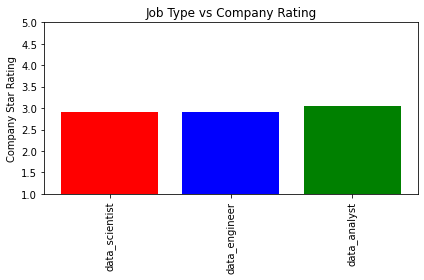

In [45]:
# Job Type Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
job_type = [value for value in mean_star_by_job_type]
x_axis_job = np.arange(len(mean_star_by_job_type))# Determine number of bars needed
tick_locations_job = [value for value in x_axis_job] # to tell the plot where to place tick marks

# Bar Chart
plt.bar(x_axis_job, job_type, color=['r', 'b', 'g'], alpha=1,  align="center")
plt.xticks(tick_locations_job, mean_star_by_job_type.index.values, rotation="vertical")
plt.ylim([1,5])
plt.title("Job Type vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()

# Saving figure
plt.savefig("./Job Type vs Company Ratings.png")

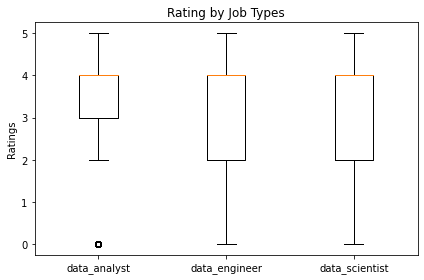

In [46]:
# Create a boxplot to compare means
job_types = ['data_analyst', 'data_engineer', 'data_scientist']
rates = []
data = []

#Setting up plot
fig1, ax1 = plt.subplots()
ax1.set_title('Rating by Job Types')
ax1.set_ylabel('Ratings')

for job in job_types:
    job_df = new_df_job_type.loc[new_df_job_type['Job_Type'] == job]
    rates.append(job_df['No_of_Stars'])
    rat = rates
    data.append(rat)
    rates = []
    
# Extracting from list fro boxplot
x1 = data[0]
x2 = data[1]
x3 = data[2]

# Convert to array source: https://www.educative.io/edpresso/how-to-convert-a-list-to-an-array-in-python
ax1.boxplot([np.array(x1[0]), np.array(x2[0]), np.array(x3[0])], labels = job_types)
plt.tight_layout()

# Saving figure
plt.savefig("./Job Type vs Company Ratings(2).png")

# Showing image
plt.show()

In [47]:
# Over all company rating mean
mean = new_df_job_type['No_of_Stars'].mean()
highest = new_df_job_type['No_of_Stars'].max()
lowest = new_df_job_type['No_of_Stars'].min()
print(lowest, mean , highest)

0.0 2.9673949579831933 5.0


## Company Rating by Company Location

In [48]:
# New Data Frame for Company Location
new_df_location = new_df_undup.loc[:, ['Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location']]

# Removing duplicates
new_df_location = new_df_location.drop_duplicates()
new_df_location

,Company,No_of_Reviews,No_of_Stars,Location
0,Express Scripts,3301.0,3.0,MO
1,Money Mart Financial Services,0.0,0.0,TX
2,comScore,62.0,4.0,OR
3,Central Intelligence Agency,158.0,4.0,DC
4,Federal Reserve Bank of Dallas,495.0,4.0,TX
...,...,...,...,...
5700,Glooko,0.0,0.0,Missing
5703,Coda Search,2.0,4.0,NY
5706,Aruba Networks,0.0,0.0,CA
5710,Intelliswift Software Inc,0.0,0.0,Missing


In [49]:
# Grouping by Location
groupby_location = new_df_location.groupby('Location')

# Checking the number of reviews in each group
sum_reviews_by_location = groupby_location['No_of_Reviews'].sum()
sum_reviews_by_location = sum_reviews_by_location.drop('Missing')
print(sum_reviews_by_location)


# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_location = groupby_location['No_of_Stars'].mean()
mean_star_by_location = mean_star_by_location.drop('Missing')
mean_star_by_location = mean_star_by_location.sort_values(ascending=True)
print(mean_star_by_location)

Location
AL          7515.0
AR        166321.0
AZ         96970.0
CA        793925.0
CO         88100.0
CT        101855.0
DC         96263.0
DE         52815.0
FL        151362.0
GA        247904.0
HI          1871.0
IA         45152.0
ID         11700.0
IL        251520.0
IN         32633.0
KS         18000.0
KY          9296.0
LA          2968.0
MA        208195.0
MD         75277.0
ME          2525.0
MI         69845.0
MN        110219.0
MO         34053.0
MT           106.0
NC        172848.0
ND            28.0
NE          3416.0
NH          3288.0
NJ        209197.0
NM          1787.0
NV         12330.0
NY        382240.0
OH        107438.0
OK           477.0
OR         59714.0
PA        123041.0
REMOTE      4247.0
RI          5597.0
SC         47071.0
SD             0.0
TN         65893.0
TX        765047.0
USA       103118.0
UT         15192.0
VA        150068.0
VT             0.0
WA        152405.0
WI         53152.0
WV           269.0
WY          4479.0
Name: No_of_Reviews, d

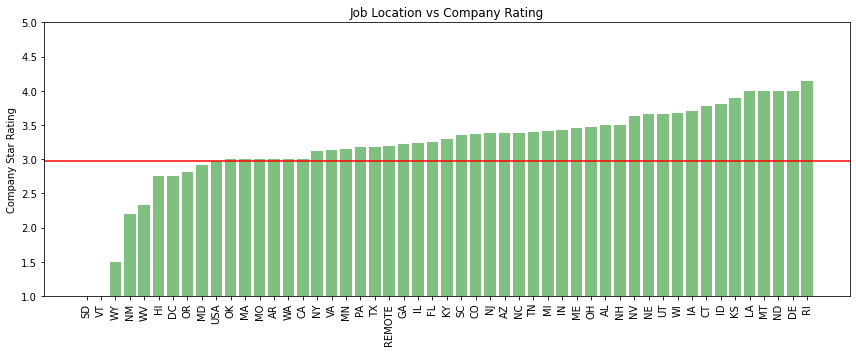

In [50]:
# Location Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
location = [value for value in mean_star_by_location]
x_axis_l = np.arange(len(mean_star_by_location))# Determine number of bars needed
tick_locations_l = [value for value in x_axis_l] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_l, location, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations_l, mean_star_by_location.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.axhline(y=mean, color = 'r')
plt.title("Job Location vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Location vs Company Ratings.png")

## Company Rating by Job Salary

In [51]:
# New Data Frame for job salary
new_df_job_salary = new_df_undup.loc[:, ['Queried_Salary', 'Job_Type', 'Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Location']]

# Removing duplicates
new_df_job_salary = new_df_job_salary.drop_duplicates()
new_df_job_salary

,Queried_Salary,Job_Type,Company,No_of_Reviews,No_of_Stars,Location
0,<80000,data_scientist,Express Scripts,3301.0,3.0,MO
1,<80000,data_scientist,Money Mart Financial Services,0.0,0.0,TX
2,<80000,data_scientist,comScore,62.0,4.0,OR
3,<80000,data_scientist,Central Intelligence Agency,158.0,4.0,DC
4,<80000,data_scientist,Federal Reserve Bank of Dallas,495.0,4.0,TX
...,...,...,...,...,...,...
5709,>160000,data_engineer,Stride Search,0.0,0.0,Missing
5710,>160000,data_engineer,Intelliswift Software Inc,0.0,0.0,Missing
5712,>160000,data_engineer,JPMorgan Chase,21159.0,4.0,DE
5713,>160000,data_engineer,Capital One,6791.0,4.0,NY


In [52]:
# Grouping by Salary
groupby_salary = new_df_job_salary.groupby('Queried_Salary')

# Checking the number of reviews in each group
sum_reviews_by_salary = groupby_salary['No_of_Reviews'].sum()
sum_reviews_by_salary = sum_reviews_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
print(sum_reviews_by_salary)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_salary = groupby_salary['No_of_Stars'].mean()
mean_star_by_salary = mean_star_by_salary[['<80000', '80000-99999', '100000-119999', '120000-139999', '140000-159999', '>160000']]
mean_star_by_salary = mean_star_by_salary.sort_values(ascending=True)
print(mean_star_by_salary)

Queried_Salary
<80000            542256.0
80000-99999      1804433.0
100000-119999    2635204.0
120000-139999    2424550.0
140000-159999    1523350.0
>160000           908022.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Queried_Salary
>160000          2.978182
<80000           3.082956
140000-159999    3.158678
100000-119999    3.197822
80000-99999      3.198726
120000-139999    3.228388
Name: No_of_Stars, dtype: float64


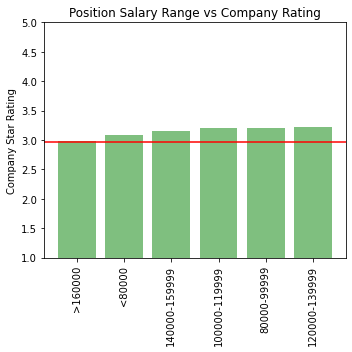

In [53]:
# Salary Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
salary = [value for value in mean_star_by_salary]
x_axis_sal = np.arange(len(mean_star_by_salary))# Determine number of bars needed
tick_loc_sal = [value for value in x_axis_sal] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_sal, salary, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_sal, mean_star_by_salary.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.axhline(y=mean, color = 'r')
plt.title("Position Salary Range vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Position Salary Range vs Company Ratings.png")

## Company Rating by Company Industry, Revenue, and # of Employees

In [54]:
# New Data Frame for Company Industry, Revenue, and # of Employees
new_df_indrevemp = new_df_undup.loc[:, ['Company', 'No_of_Reviews', 
                                 'No_of_Stars', 'Company_Revenue', 
                                 'Company_Employees', 'Company_Industry']]

# Removing duplicates
new_df_indrevemp = new_df_indrevemp.drop_duplicates()
new_df_indrevemp

,Company,No_of_Reviews,No_of_Stars,Company_Revenue,Company_Employees,Company_Industry
0,Express Scripts,3301.0,3.0,More than $10B (USD),"10,000+",Health Care
1,Money Mart Financial Services,0.0,0.0,Missing,missing,Not Listed
2,comScore,62.0,4.0,Missing,missing,Not Listed
3,Central Intelligence Agency,158.0,4.0,Missing,missing,Government
4,Federal Reserve Bank of Dallas,495.0,4.0,Missing,"Less than 10,000",Banks and Financial Services
...,...,...,...,...,...,...
5656,Avvo,16.0,4.0,Missing,missing,Not Listed
5673,The Meet Group,0.0,0.0,Missing,missing,Not Listed
5700,Glooko,0.0,0.0,Missing,missing,Not Listed
5703,Coda Search,2.0,4.0,Missing,missing,Human Resources and Staffing


In [55]:
# Grouping by Company Industry
groupby_industry = new_df_indrevemp.groupby('Company_Industry')

# Checking the number of reviews in each group
sum_reviews_by_industry = groupby_industry['No_of_Reviews'].sum()
sum_reviews_by_industry = sum_reviews_by_industry.drop("Not Listed")
print(sum_reviews_by_industry)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_industry = groupby_industry['No_of_Stars'].mean()
mean_star_by_industry = mean_star_by_industry.drop("Not Listed")
mean_star_by_industry = mean_star_by_industry.sort_values(ascending=True)
print(mean_star_by_industry)

Company_Industry
Aerospace and Defense                                               52474.0
Agriculture and Extraction                                           8215.0
Auto                                                                45733.0
Banks and Financial Services                                       230114.0
Computers and Electronics                                           57434.0
Construction                                                         4209.0
Consulting and Business Services                                   159637.0
Consumer Goods and Services                                         51014.0
Education and Schools                                               27464.0
Energy and Utilities                                                17395.0
Food and Beverages                                                  55690.0
Food and BeveragesConsulting and Business Services                  13098.0
Government                                                          122

<ipython-input-56-9d262a9dd575>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


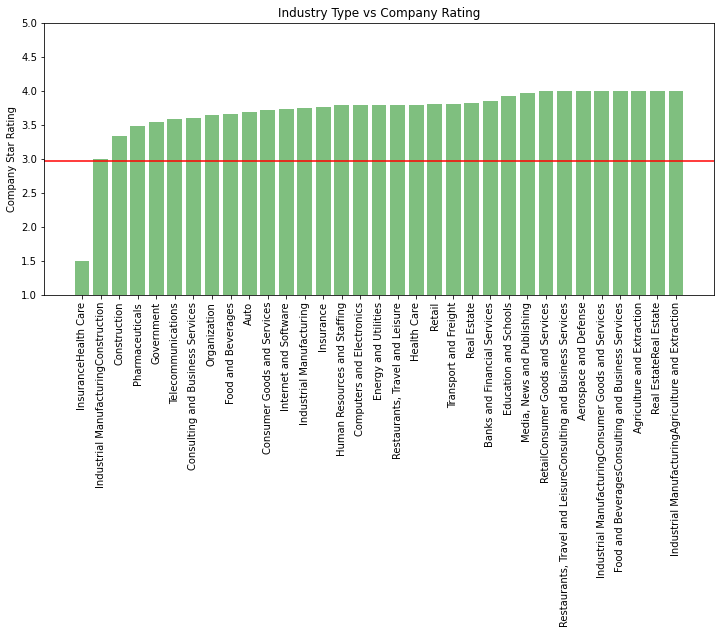

In [56]:
# Industry Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
industry = [value for value in mean_star_by_industry]
x_axis_in = np.arange(len(mean_star_by_industry))# Determine number of bars needed
tick_locations_in = [value for value in x_axis_in] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(12,5))
plt.bar(x_axis_in, industry, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations_in, mean_star_by_industry.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.axhline(y=mean, color = 'r')
plt.title("Industry Type vs Company Rating")
plt.ylabel("Company Star Rating")
plt.tight_layout()



# Saving figure
plt.savefig("./Industry vs Company Ratings.png")

In [57]:
# Grouping by Employees
groupby_employee = new_df_indrevemp.groupby('Company_Employees')

# Checking the number of reviews in each group
sum_reviews_by_employee = groupby_employee['No_of_Reviews'].sum()
sum_reviews_by_employee = sum_reviews_by_employee.drop('missing')
sum_reviews_by_employee = sum_reviews_by_employee[['Less than 10,000', '10,000+']]
print(sum_reviews_by_employee)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_employee = groupby_employee['No_of_Stars'].mean()
mean_star_by_employee = mean_star_by_employee.drop('missing')
mean_star_by_employee = mean_star_by_employee[['Less than 10,000', '10,000+']]
mean_star_by_employee = mean_star_by_employee.sort_values(ascending=True)
print(mean_star_by_employee)

Company_Employees
Less than 10,000     102942.0
10,000+             1814555.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Employees
Less than 10,000    3.699411
10,000+             3.817352
Name: No_of_Stars, dtype: float64


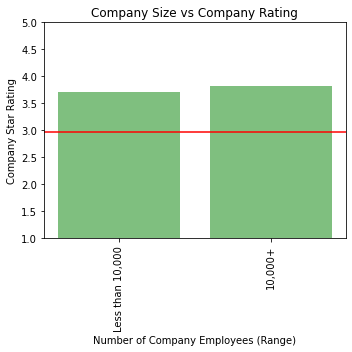

In [58]:
# Employee Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
employee = [value for value in mean_star_by_employee]
x_axis_emp = np.arange(len(mean_star_by_employee))# Determine number of bars needed
tick_loc_emp = [value for value in x_axis_emp] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_emp, employee, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_emp, mean_star_by_employee.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.axhline(y=mean, color = 'r')
plt.title("Company Size vs Company Rating")
plt.xlabel("Number of Company Employees (Range)")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Number of Company Employees vs Company Ratings.png")

In [59]:
# Grouping by Revenue
groupby_revenue = new_df_indrevemp.groupby('Company_Revenue')

# Checking the number of reviews in each group
sum_reviews_by_revenue = groupby_revenue['No_of_Reviews'].sum()
sum_reviews_by_revenue =  sum_reviews_by_revenue.drop("Missing")
sum_reviews_by_revenue = sum_reviews_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
print(sum_reviews_by_revenue)

# Creating division
print('----------------------------------------------------------')

# What is the average stars by job type
mean_star_by_revenue = groupby_revenue['No_of_Stars'].mean()
mean_star_by_revenue = mean_star_by_revenue.drop("Missing")
mean_star_by_revenue = mean_star_by_revenue[['Less than $1B (USD)', '$1B to $5B (USD)', '$5B to $10B (USD)', 'More than $10B (USD)']]
mean_star_by_revenue = mean_star_by_revenue.sort_values(ascending=True)
print(mean_star_by_revenue)

Company_Revenue
Less than $1B (USD)       33699.0
$1B to $5B (USD)          90844.0
$5B to $10B (USD)        189015.0
More than $10B (USD)    1260041.0
Name: No_of_Reviews, dtype: float64
----------------------------------------------------------
Company_Revenue
Less than $1B (USD)     3.656934
$5B to $10B (USD)       3.717647
$1B to $5B (USD)        3.769231
More than $10B (USD)    3.842857
Name: No_of_Stars, dtype: float64


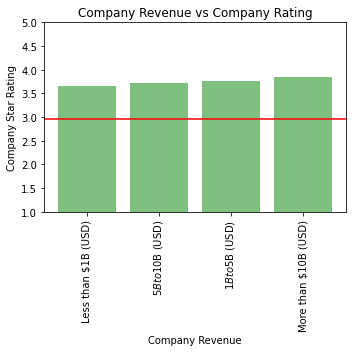

In [60]:
# Revenue Ratings - Barplot

# An array that contains the star rating by job type, length of array and tick mark locations
revenue = [value for value in mean_star_by_revenue]
x_axis_rev = np.arange(len(mean_star_by_revenue))# Determine number of bars needed
tick_loc_rev = [value for value in x_axis_rev] # to tell the plot where to place tick marks

# Bar Chart
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(x_axis_rev, revenue, color='g', alpha=0.5, align="center")
plt.xticks(tick_loc_rev, mean_star_by_revenue.index.values, rotation="vertical")
plt.ylim([1,5])
plt.ylim([1,5])
plt.axhline(y=mean, color = 'r')
plt.title("Company Revenue vs Company Rating")
plt.xlabel("Company Revenue")
plt.ylabel("Company Star Rating")
plt.tight_layout()


# Saving figure
plt.savefig("./Company Revenue vs Company Ratings.png")

## Shailza's Code...
#### There was a minor GitHub Push/Pull mishap and the info is missing.  Thanks Gents for being understanding!

## Jennifer's Code Start Here

In [61]:
file = "./Indeed Data Set.csv"

clean_indeed_df = pd.read_csv(file)
clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0.0,0,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,4,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,0.0,0,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,4,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


In [62]:
#Remove columns with 0 in no of skills column
a= [0]
clean_indeed_df = clean_indeed_df[~clean_indeed_df['No_of_Skills'].isin(a)]
clean_indeed_df

,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3,MO,More than $10B (USD),...,0,0,0,1,0,0,0,1,0,0
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,0.0,0,TX,Missing,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,4,OR,Missing,...,0,0,0,1,0,0,0,0,0,0
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4,DC,Missing,...,0,1,0,0,0,0,0,0,0,1
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4,TX,Missing,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12,Intelliswift Software Inc,0.0,0,Missing,Missing,...,0,0,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8,Jobspring Partners,31.0,4,CA,Missing,...,0,0,0,0,0,0,0,0,0,1
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13,JPMorgan Chase,21159.0,4,DE,More than $10B (USD),...,0,0,0,1,0,0,1,0,0,0
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15,Capital One,6791.0,4,NY,More than $10B (USD),...,0,0,0,0,0,0,1,0,0,0


## Data Analytics No of Skills Pie Chart

In [63]:
#Number of skills required by job type:
data_analyst_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_analyst"]
count= data_analyst_df['No_of_Skills'].value_counts()
#count
total= data_analyst_df['No_of_Skills'].count()
#total
percentage= (count/total)*100
#percentage
analyst_no_skills_df = pd.DataFrame(percentage)
analyst_no_skills_df.reindex
analyst_no_skills_df

,No_of_Skills
3,14.785276
4,13.742331
5,13.312883
2,12.699387
6,10.920245
1,10.245399
7,6.073620
8,5.644172
9,4.294479
10,2.453988


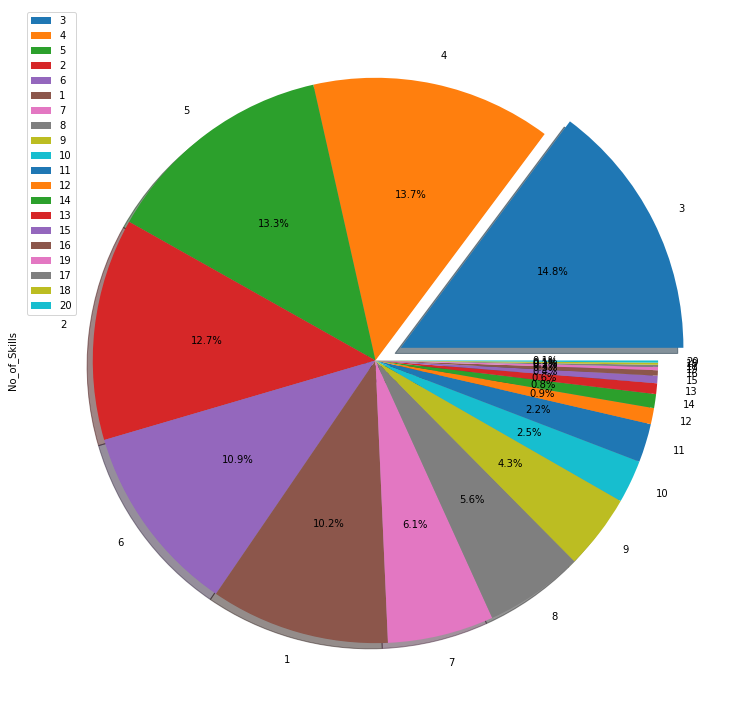

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

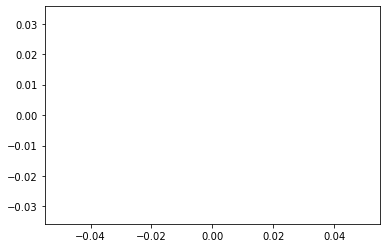

In [64]:
explode = (.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plot = analyst_no_skills_df.plot.pie(y='No_of_Skills', explode=explode, autopct='%1.1f%%', shadow= True, figsize=(13, 13))

plt.show()
plt.axis("equal")

## Data Engineer No of Skills Pie Chart

In [65]:
#Number of skills required by job type:
data_eng_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_engineer"]
count= data_eng_df['No_of_Skills'].value_counts()
#count
total_da= data_eng_df['No_of_Skills'].count()
#total
percentage= (count/total_da)*100
#percentage
eng_no_skills_df = pd.DataFrame(percentage)
eng_no_skills_df.reindex
eng_no_skills_df

,No_of_Skills
20,9.137804
8,8.327192
9,8.179808
10,6.705969
11,6.632277
6,5.895357
14,5.895357
5,5.674282
7,5.453206
12,5.232130


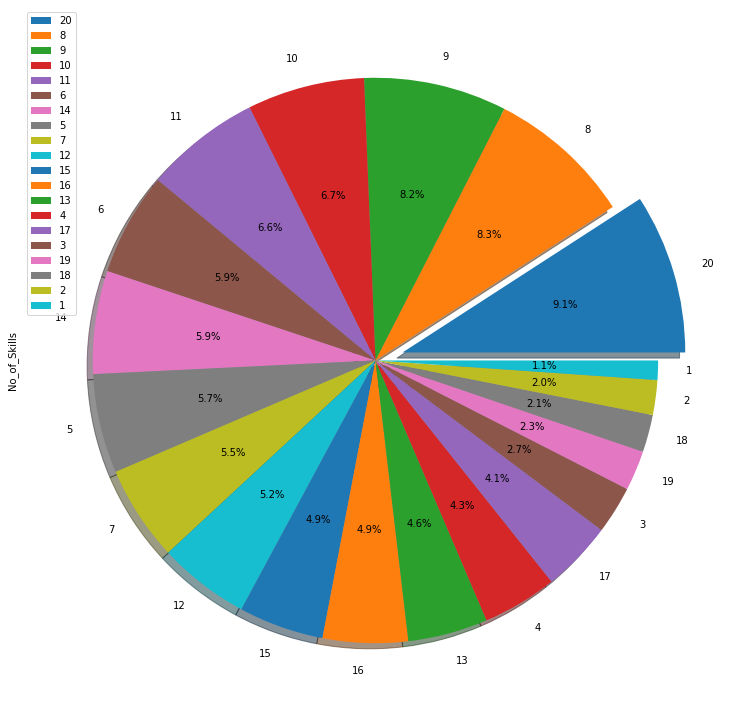

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

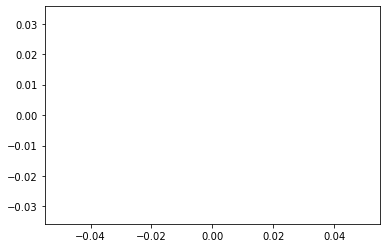

In [66]:
explode = (.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plot = eng_no_skills_df.plot.pie(y='No_of_Skills', explode=explode, autopct='%1.1f%%', shadow= True, figsize=(13, 13))

plt.show()
plt.axis("equal")

## Data Scientist No of Skills Pie Chart

In [67]:
#Number of skills required by job type:
data_sc_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_scientist"]
count= data_sc_df['No_of_Skills'].value_counts()
#count
total_sc= data_sc_df['No_of_Skills'].count()
#total
percentage= (count/total_sc)*100
#percentage
ds_no_skills_df = pd.DataFrame(percentage)
ds_no_skills_df.reindex
ds_no_skills_df

,No_of_Skills
7,9.775641
5,8.814103
4,7.932692
8,7.892628
6,7.812500
11,6.690705
10,6.570513
9,6.450321
12,5.889423
3,5.528846


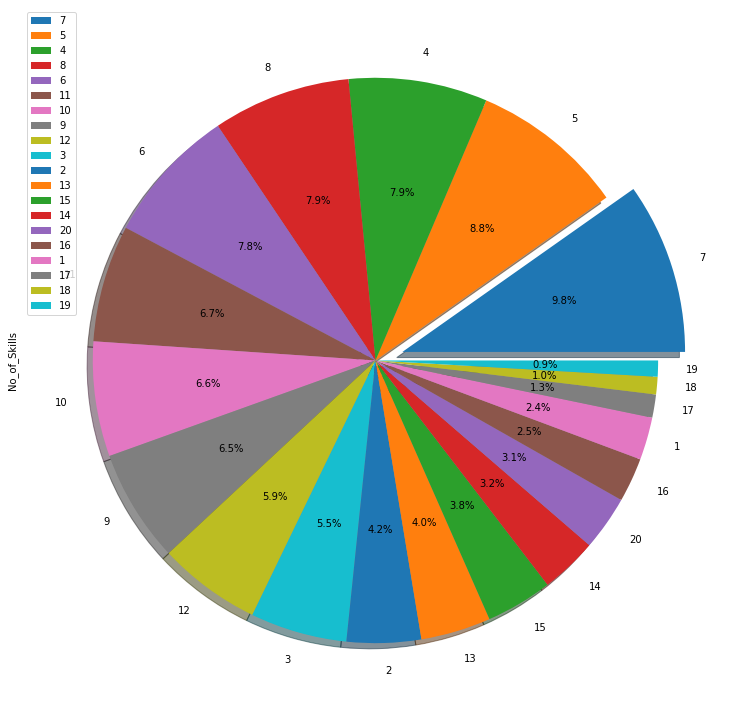

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

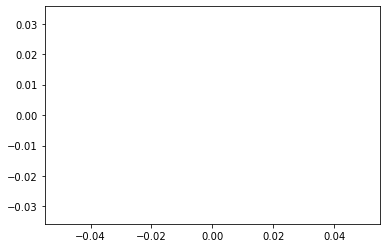

In [68]:
explode = (.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plot = ds_no_skills_df.plot.pie(y='No_of_Skills', explode=explode, autopct='%1.1f%%', shadow= True, figsize=(13, 13))

plt.show()
plt.axis("equal")

## Data Analyst No. of Skills Bar Chart

In [69]:
#Skills per salary
data_analyst_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_analyst"]
data_analyst_df

#<80000
da_1_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "<80000"]
da_1_df
skills_per_salary_df = da_1_df['No_of_Skills'].value_counts()
print(skills_per_salary_df)

#80000-99999
da_2_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "80000-99999"]
da_2_df
skills_per_salary_df2 = da_2_df['No_of_Skills'].value_counts()
skills_per_salary_df2

#100000-119999
da_3_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "100000-119999"]
da_3_df
skills_per_salary_df3 = da_3_df['No_of_Skills'].value_counts()
skills_per_salary_df3

#120000-139999
da_4_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "120000-139999"]
da_4_df
skills_per_salary_df4 = da_4_df['No_of_Skills'].value_counts()
skills_per_salary_df4

#140000-159999
da_5_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "140000-159999"]
da_5_df
skills_per_salary_df5 = da_5_df['No_of_Skills'].value_counts()
print(skills_per_salary_df5)

#>160000 - empty
da_6_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== ">160000 "]
da_6_df
# skills_per_salary_df6 = da_6_df['No_of_Skills'].value_counts()
# skills_per_salary_df6

3     119
1      89
2      87
4      83
5      77
6      68
7      27
8      21
9      13
11     12
10     11
12      3
16      2
13      1
14      1
17      1
18      1
19      1
Name: No_of_Skills, dtype: int64
2     16
3      5
5      4
6      4
1      3
7      3
8      3
4      2
10     2
9      1
12     1
14     1
Name: No_of_Skills, dtype: int64


,Job_Title,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Location,Company_Revenue,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries


In [70]:
df = pd.DataFrame({
    "<80000": skills_per_salary_df,
    "80000-99999":skills_per_salary_df2,
    "100000-119999":skills_per_salary_df3,
    "120000-139999":skills_per_salary_df4,
    "140000-159999":skills_per_salary_df5})
df

,<80000,80000-99999,100000-119999,120000-139999,140000-159999
1,89.0,45.0,15.0,1.0,3.0
2,87.0,69.0,22.0,2.0,16.0
3,119.0,72.0,26.0,9.0,5.0
4,83.0,76.0,46.0,6.0,2.0
5,77.0,89.0,28.0,10.0,4.0
6,68.0,57.0,35.0,9.0,4.0
7,27.0,41.0,19.0,5.0,3.0
8,21.0,42.0,19.0,6.0,3.0
9,13.0,21.0,21.0,9.0,1.0
10,11.0,12.0,12.0,2.0,2.0


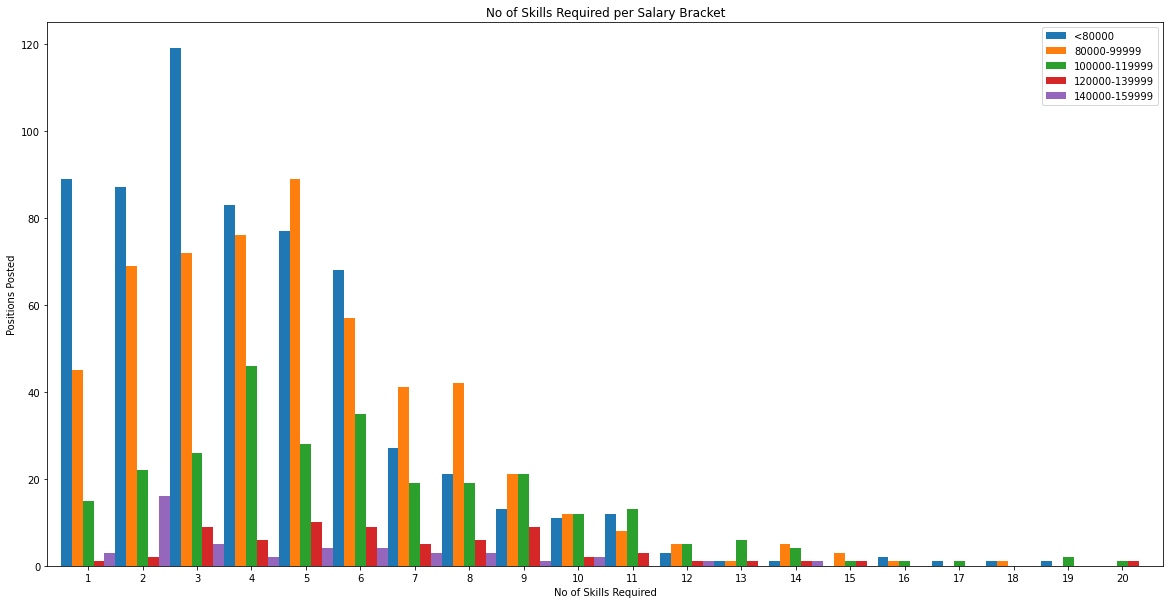

In [71]:
ax = df.plot.bar(rot=0, width=1, figsize=(20, 10))
plt.title("No of Skills Required per Salary Bracket")
plt.xlabel("No of Skills Required")
plt.ylabel("Positions Posted")
plt.show()

## Data Engineer No. of Skills Bar Chart

In [72]:
#Skills per salary
data_eng_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_engineer"]
data_analyst_df

#<80000
de_1_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "<80000"]
de_1_df
de_skills_per_salary_df = de_1_df['No_of_Skills'].value_counts()
#print(skills_per_salary_df)

#80000-99999
de_2_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "80000-99999"]
de_2_df
de_skills_per_salary_df2 = de_2_df['No_of_Skills'].value_counts()
de_skills_per_salary_df2

#100000-119999
de_3_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "100000-119999"]
de_3_df
de_skills_per_salary_df3 = de_3_df['No_of_Skills'].value_counts()
de_skills_per_salary_df3

#120000-139999
de_4_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "120000-139999"]
de_4_df
de_skills_per_salary_df4 = de_4_df['No_of_Skills'].value_counts()
de_skills_per_salary_df4

#140000-159999
de_5_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "140000-159999"]
de_5_df
de_skills_per_salary_df5 = de_5_df['No_of_Skills'].value_counts()
#print(skills_per_salary_df5)

#>160000
de_6_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== ">160000 "]
de_6_df
de_skills_per_salary_df6 = de_6_df['No_of_Skills'].value_counts()
de_skills_per_salary_df6

Series([], Name: No_of_Skills, dtype: int64)

In [73]:
de_df = pd.DataFrame({
    "<80000": de_skills_per_salary_df,
    "80000-99999":de_skills_per_salary_df2,
    "100000-119999":de_skills_per_salary_df3,
    "120000-139999":de_skills_per_salary_df4,
    "140000-159999":de_skills_per_salary_df5,
    "160000+": de_skills_per_salary_df6})
de_df

,<80000,80000-99999,100000-119999,120000-139999,140000-159999,160000+
1,2.0,4.0,4,4,NaN,NaN
2,1.0,3.0,9,9,1.0,NaN
3,2.0,5.0,12,12,4.0,NaN
4,2.0,6.0,21,15,9.0,NaN
5,5.0,9.0,21,19,19.0,NaN
6,3.0,8.0,20,20,16.0,NaN
7,2.0,12.0,28,17,11.0,NaN
8,1.0,10.0,19,40,29.0,NaN
9,1.0,13.0,33,42,13.0,NaN
10,NaN,8.0,16,27,33.0,NaN


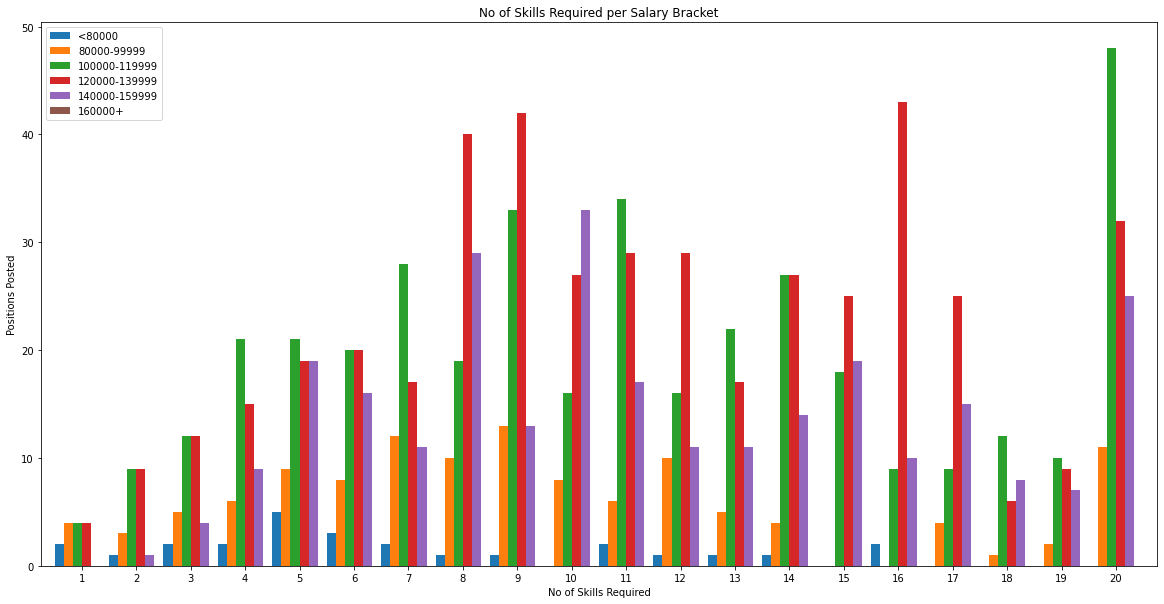

In [74]:
ax = de_df.plot.bar(rot=0, width=1, figsize=(20, 10))
plt.title("No of Skills Required per Salary Bracket")
plt.xlabel("No of Skills Required")
plt.ylabel("Positions Posted")
plt.show()

## Data Scientist No. of Skills Bar Chart

In [75]:
#Skills per salary
data_sc_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_scientist"]
data_sc_df

#<80000
ds_1_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "<80000"]
ds_1_df
ds_skills_per_salary_df = ds_1_df['No_of_Skills'].value_counts()
#print(skills_per_salary_df)

#80000-99999
ds_2_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "80000-99999"]
ds_2_df
ds_skills_per_salary_df2 = ds_2_df['No_of_Skills'].value_counts()
ds_skills_per_salary_df2

#100000-119999
ds_3_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "100000-119999"]
ds_3_df
ds_skills_per_salary_df3 = ds_3_df['No_of_Skills'].value_counts()
ds_skills_per_salary_df3

#120000-139999
ds_4_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "120000-139999"]
ds_4_df
ds_skills_per_salary_df4 = ds_4_df['No_of_Skills'].value_counts()
ds_skills_per_salary_df4

#140000-159999
ds_5_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "140000-159999"]
ds_5_df
ds_skills_per_salary_df5 = ds_5_df['No_of_Skills'].value_counts()
#print(skills_per_salary_df5)

#>160000
ds_6_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== ">160000 "]
ds_6_df
ds_skills_per_salary_df6 = ds_6_df['No_of_Skills'].value_counts()
ds_skills_per_salary_df6

Series([], Name: No_of_Skills, dtype: int64)

In [76]:
ds_df = pd.DataFrame({
    "<80000": ds_skills_per_salary_df,
    "80000-99999":ds_skills_per_salary_df2,
    "100000-119999":ds_skills_per_salary_df3,
    "120000-139999":ds_skills_per_salary_df4,
    "140000-159999":ds_skills_per_salary_df5,
    "160000+": ds_skills_per_salary_df6})
ds_df

,<80000,80000-99999,100000-119999,120000-139999,140000-159999,160000+
1,3.0,9.0,26,9,6,NaN
2,6.0,12.0,33,30,13,NaN
3,6.0,14.0,43,35,22,NaN
4,4.0,20.0,58,60,37,NaN
5,4.0,19.0,53,55,61,NaN
6,5.0,26.0,49,66,38,NaN
7,5.0,21.0,89,59,53,NaN
8,5.0,15.0,56,64,37,NaN
9,2.0,7.0,42,56,36,NaN
10,2.0,11.0,51,56,36,NaN


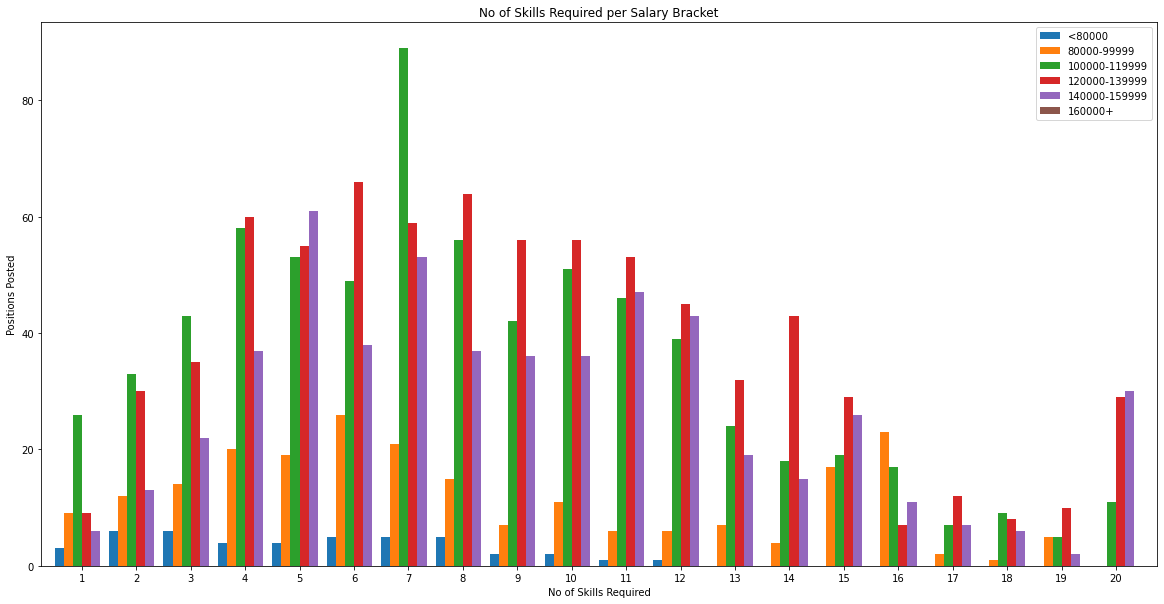

In [77]:
ax = ds_df.plot.bar(rot=0, width=1, figsize=(20, 10))
plt.title("No of Skills Required per Salary Bracket")
plt.xlabel("No of Skills Required")
plt.ylabel("Positions Posted")
plt.show()

## Company Industry by Salary - DA

In [78]:
#Salary per industry
NL= ["Not Listed"]
clean_indeed_df = clean_indeed_df[~clean_indeed_df['Company_Industry'].isin(NL)]
clean_indeed_df

data_analyst_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_analyst"]

#<80000
da_1_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "<80000"]
industry_test = da_1_df['Company_Industry'].unique()
industry_per_salary80_df = da_1_df['Company_Industry'].value_counts()
idf80 = industry_per_salary80_df.to_frame() 
idf80= idf80.rename(columns={"Company_Industry": "one"})

#80000-99999
da_2_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "80000-99999"]
industry_per_salary100_df = da_2_df['Company_Industry'].value_counts()
idf100 = industry_per_salary100_df.to_frame() 
idf100= idf100.rename(columns={"Company_Industry": "two"})

# #100000-119999
da_3_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "100000-119999"]
industry_per_salary120_df = da_3_df['Company_Industry'].value_counts()
idf120 = industry_per_salary120_df.to_frame() 
idf120= idf120.rename(columns={"Company_Industry": "three"})

#120000-139999
da_4_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "120000-139999"]
industry_per_salary140_df = da_4_df['Company_Industry'].value_counts()
idf140 = industry_per_salary140_df.to_frame() 
idf140= idf140.rename(columns={"Company_Industry": "four"})

#140000-159999
da_5_df = data_analyst_df.loc[data_analyst_df["Queried_Salary"]== "140000-159999"]
industry_per_salary160_df = da_5_df['Company_Industry'].value_counts()
idf160 = industry_per_salary160_df.to_frame() 
idf160= idf160.rename(columns={"Company_Industry": "five"})

forplot = pd.concat([idf80, idf100, idf120, idf140, idf160], axis=1)
forplot

,one,two,three,four,five
Health Care,77.0,43.0,10.0,2.0,1.0
Education and Schools,51.0,16.0,3.0,NaN,NaN
Consulting and Business Services,49.0,47.0,34.0,6.0,6.0
Banks and Financial Services,34.0,50.0,28.0,19.0,2.0
Insurance,26.0,16.0,8.0,NaN,9.0
Internet and Software,21.0,54.0,42.0,9.0,8.0
InsuranceHealth Care,20.0,14.0,NaN,NaN,NaN
Government,19.0,11.0,3.0,NaN,NaN
Aerospace and Defense,16.0,7.0,6.0,2.0,NaN
Consumer Goods and Services,14.0,10.0,9.0,NaN,NaN


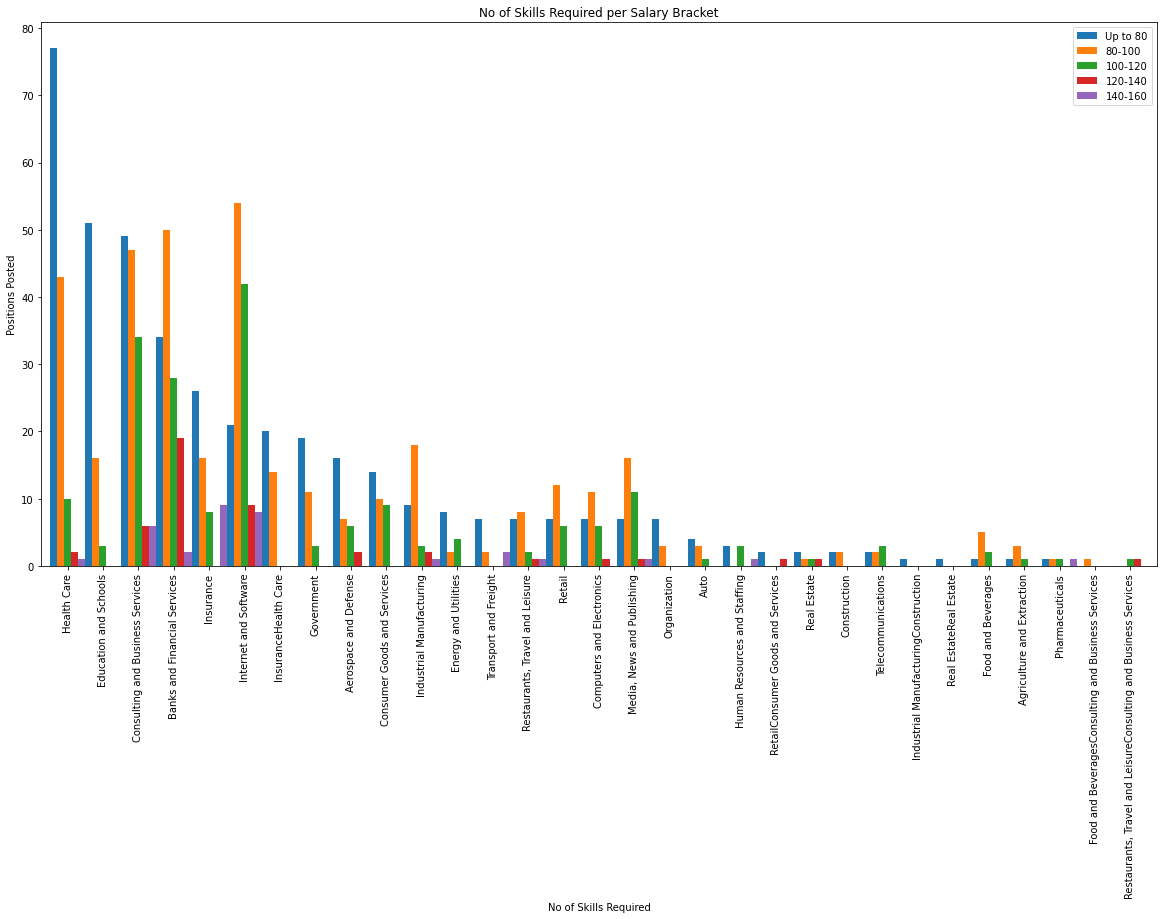

In [79]:
ax = forplot.plot.bar(rot=90, width=1, figsize=(20, 10))
plt.title("Company Industry per Salary Bracket")
plt.xlabel("Industry")
plt.ylabel("Positions Posted")
plt.legend(["Up to 80", "80-100", "100-120", "120-140", "140-160"])
plt.show()

## Company Industry by Salary- DE

In [80]:
#Salary per industry
NL= ["Not Listed"]
clean_indeed_df = clean_indeed_df[~clean_indeed_df['Company_Industry'].isin(NL)]
clean_indeed_df

data_eng_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_engineer"]

#<80000
de_1_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "<80000"]
industry_test = de_1_df['Company_Industry'].unique()
industry_per_salary80_df = de_1_df['Company_Industry'].value_counts()
idedf80 = industry_per_salary80_df.to_frame() 
idedf80= idedf80.rename(columns={"Company_Industry": "one"})

#80000-99999
de_2_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "80000-99999"]
industry_per_salary100_df = de_2_df['Company_Industry'].value_counts()
idedf100 = industry_per_salary100_df.to_frame() 
idedf100= idedf100.rename(columns={"Company_Industry": "two"})

# #100000-119999
de_3_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "100000-119999"]
industry_per_salary120_df = de_3_df['Company_Industry'].value_counts()
idedf120 = industry_per_salary120_df.to_frame() 
idedf120= idedf120.rename(columns={"Company_Industry": "three"})

#120000-139999
de_4_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "120000-139999"]
industry_per_salary140_df = de_4_df['Company_Industry'].value_counts()
idedf140 = industry_per_salary140_df.to_frame() 
idedf140= idedf140.rename(columns={"Company_Industry": "four"})

#140000-159999
de_5_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== "140000-159999"]
industry_per_salary160_df = de_5_df['Company_Industry'].value_counts()
idedf160 = industry_per_salary160_df.to_frame() 
idedf160= idedf160.rename(columns={"Company_Industry": "five"})

#>160000
de_6_df = data_eng_df.loc[data_eng_df["Queried_Salary"]== ">160000"]
industry_per_salaryo160_df = de_6_df['Company_Industry'].value_counts()
idedfo160 = industry_per_salaryo160_df.to_frame() 
idedfo160= idedfo160.rename(columns={"Company_Industry": "six"})

forplot1 = pd.concat([idedf80, idedf100, idedf120, idedf140, idedf160, idedfo160], axis=1)
forplot1

,one,two,three,four,five,six
Health Care,6.0,8.0,20.0,19.0,5.0,1.0
Banks and Financial Services,3.0,15.0,35.0,45.0,31.0,11.0
"Restaurants, Travel and Leisure",2.0,3.0,6.0,4.0,1.0,NaN
Government,2.0,1.0,3.0,1.0,NaN,NaN
Insurance,1.0,5.0,35.0,17.0,6.0,2.0
Aerospace and Defense,1.0,1.0,5.0,7.0,6.0,1.0
Human Resources and Staffing,1.0,NaN,4.0,5.0,6.0,16.0
Transport and Freight,1.0,3.0,4.0,3.0,NaN,NaN
Consulting and Business Services,1.0,8.0,58.0,46.0,30.0,22.0
Education and Schools,1.0,1.0,3.0,3.0,1.0,NaN


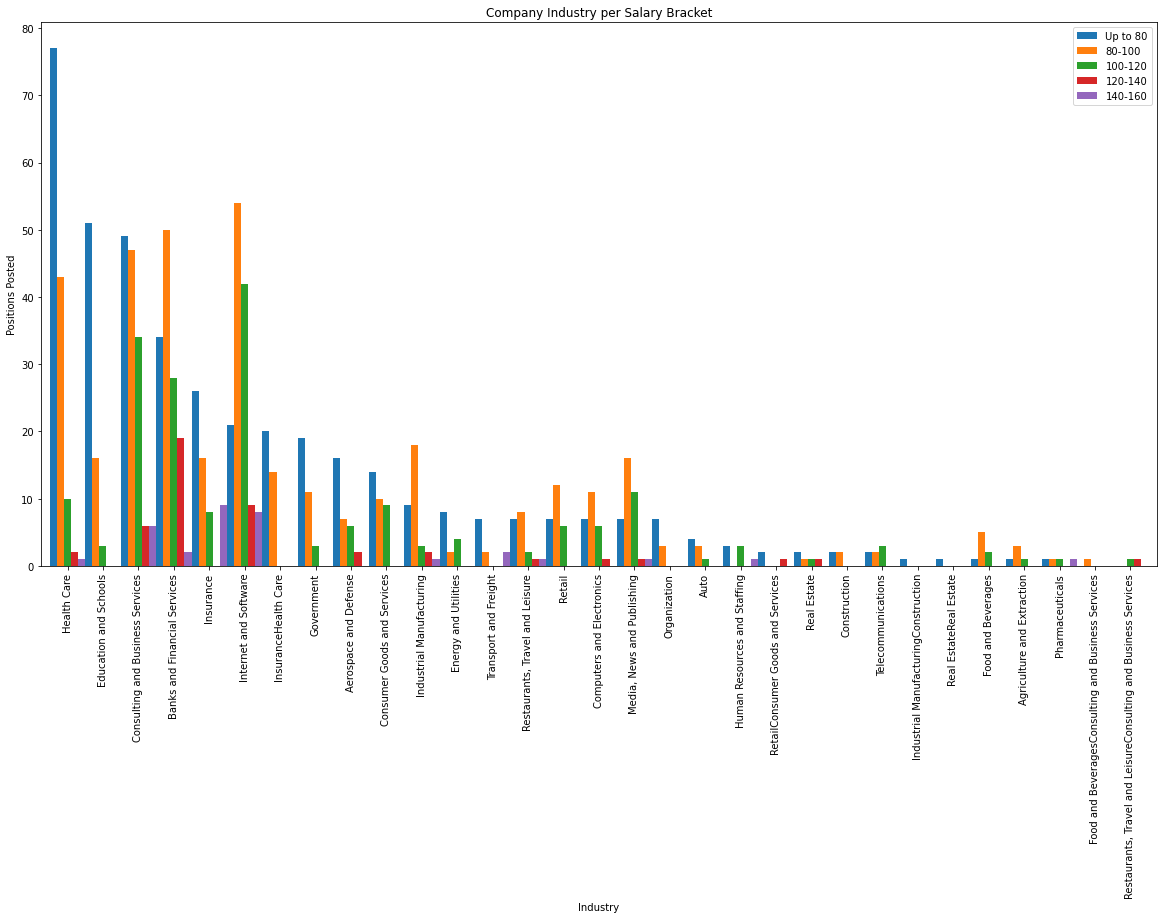

In [81]:
ax = forplot.plot.bar(rot=90, width=1, figsize=(20, 10))
plt.title("Company Industry per Salary Bracket")
plt.xlabel("Industry")
plt.ylabel("Positions Posted")
plt.legend(["Up to 80", "80-100", "100-120", "120-140", "140-160", "160+"])
plt.show()

## Company Industry by Salary- DS

In [82]:
#Salary per industry
NL= ["Not Listed"]
clean_indeed_df = clean_indeed_df[~clean_indeed_df['Company_Industry'].isin(NL)]
clean_indeed_df

data_sc_df = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_scientist"]

#<80000
ds_1_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "<80000"]
industry_test = ds_1_df['Company_Industry'].unique()
industry_per_salary80_df = ds_1_df['Company_Industry'].value_counts()
idsdf80 = industry_per_salary80_df.to_frame() 
idsdf80= idsdf80.rename(columns={"Company_Industry": "one"})

#80000-99999
ds_2_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "80000-99999"]
industry_per_salary100_df = ds_2_df['Company_Industry'].value_counts()
idsdf100 = industry_per_salary100_df.to_frame() 
idsdf100= idsdf100.rename(columns={"Company_Industry": "two"})

# #100000-119999
ds_3_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "100000-119999"]
industry_per_salary120_df = ds_3_df['Company_Industry'].value_counts()
idsdf120 = industry_per_salary120_df.to_frame() 
idsdf120= idsdf120.rename(columns={"Company_Industry": "three"})

#120000-139999
ds_4_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "120000-139999"]
industry_per_salary140_df = ds_4_df['Company_Industry'].value_counts()
idsdf140 = industry_per_salary140_df.to_frame() 
idsdf140= idsdf140.rename(columns={"Company_Industry": "four"})

#140000-159999
ds_5_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== "140000-159999"]
industry_per_salary160_df = ds_5_df['Company_Industry'].value_counts()
idsdf160 = industry_per_salary160_df.to_frame() 
idsdf160= idsdf160.rename(columns={"Company_Industry": "five"})

#>160000
ds_6_df = data_sc_df.loc[data_sc_df["Queried_Salary"]== ">160000"]
industry_per_salaryo160_df = ds_6_df['Company_Industry'].value_counts()
idsdfo160 = industry_per_salaryo160_df.to_frame() 
idsdfo160= idsdfo160.rename(columns={"Company_Industry": "six"})

forplot2 = pd.concat([idsdf80, idsdf100, idsdf120, idsdf140, idsdf160, idsdfo160], axis=1)
forplot2

,one,two,three,four,five,six
Education and Schools,8.0,7.0,12.0,2.0,NaN,NaN
Health Care,5.0,18.0,49.0,25.0,14.0,1.0
Government,5.0,7.0,5.0,4.0,NaN,NaN
Internet and Software,5.0,10.0,71.0,110.0,104.0,25.0
Consulting and Business Services,4.0,52.0,90.0,136.0,65.0,36.0
Aerospace and Defense,3.0,13.0,25.0,19.0,14.0,1.0
Transport and Freight,1.0,2.0,7.0,8.0,1.0,1.0
Energy and Utilities,1.0,5.0,8.0,5.0,2.0,1.0
Organization,1.0,1.0,5.0,3.0,NaN,NaN
Banks and Financial Services,1.0,12.0,46.0,53.0,40.0,20.0


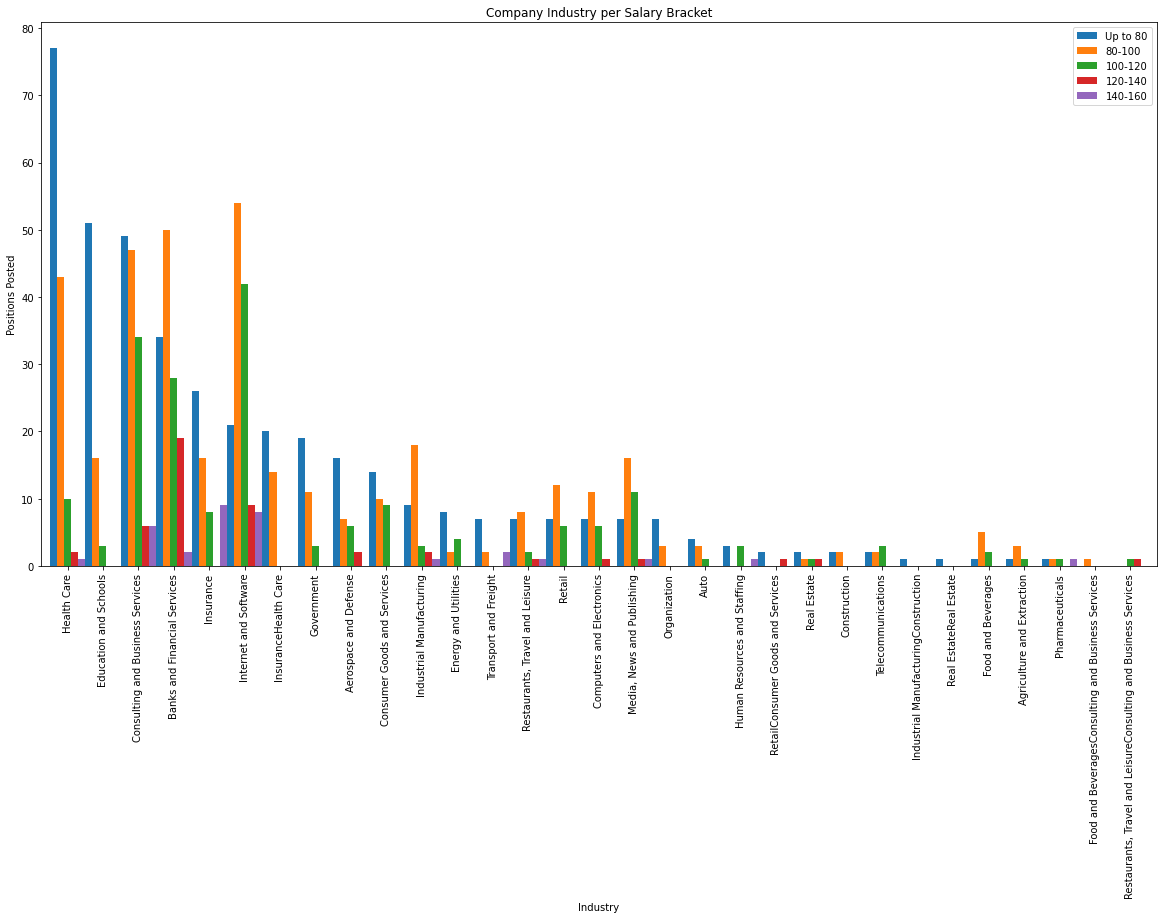

In [92]:
ax = forplot.plot.bar(rot=90, width=1, figsize=(20, 10))
plt.title("Company Industry per Salary Bracket")
plt.xlabel("Industry")
plt.ylabel("Positions Posted")
plt.legend(["Up to 80", "80-100", "100-120", "120-140", "140-160", "160+"])
plt.show()

## Company Revenue by Salary - DA

In [94]:
Mis= ["Missing"]
#clean_indeed_df = clean_indeed_df[~clean_indeed_df['Company_Revenue'].isin(Mis)]
#clean_indeed_df.tail(50)
clean_indeed_df = clean_indeed_df.loc[clean_indeed_df['Company_Revenue'] != "Missing", :]

data_analyst_df_cr = clean_indeed_df.loc[clean_indeed_df["Job_Type"]== "data_analyst"]
#rev_per_salary_df = data_analyst_df_cr['Company_Revenue'].value_counts()
#rev_per_salary_df.head(50)

# #<80000
da_1cr_df = data_analyst_df_cr.loc[data_analyst_df_cr["Queried_Salary"]== "<80000"]
rev_per_salary_df = da_1cr_df['Company_Revenue'].value_counts()
rdf80 = rev_per_salary_df.to_frame() 
rdf80= rdf80.rename(columns={"Company_Revenue": "one"})
rdf80

# #80000-99999
da_2cr_df = data_analyst_df_cr.loc[data_analyst_df_cr["Queried_Salary"]== "80000-99999"]
rev_per_salary_df = da_2cr_df['Company_Revenue'].value_counts()
rdf100 = rev_per_salary_df.to_frame() 
rdf100= rdf100.rename(columns={"Company_Revenue": "two"})
rdf100

# # #100000-119999
da_3cr_df = data_analyst_df_cr.loc[data_analyst_df_cr["Queried_Salary"]== "100000-119999"]
rev_per_salary_df = da_3cr_df['Company_Revenue'].value_counts()
rdf120 = rev_per_salary_df.to_frame() 
rdf120= rdf120.rename(columns={"Company_Revenue": "three"})
rdf120

# #120000-139999
da_4cr_df = data_analyst_df_cr.loc[data_analyst_df_cr["Queried_Salary"]== "120000-139999"]
rev_per_salary_df = da_4cr_df['Company_Revenue'].value_counts()
rdf140 = rev_per_salary_df.to_frame() 
rdf140= rdf140.rename(columns={"Company_Revenue": "four"})
rdf140

# #140000-159999
da_5cr_df = data_analyst_df_cr.loc[data_analyst_df_cr["Queried_Salary"]== "140000-159999"]
rev_per_salary_df = da_5cr_df['Company_Revenue'].value_counts()
rdf160 = rev_per_salary_df.to_frame() 
rdf160= rdf160.rename(columns={"Company_Revenue": "five"})
rdf160

forplot1 = pd.concat([rdf80, rdf100, rdf120, rdf140, rdf160], axis=1)
forplot1

,one,two,three,four,five
More than $10B (USD),52,68,44,22,14
$5B to $10B (USD),43,31,11,4,1
Less than $1B (USD),33,30,11,2,2
$1B to $5B (USD),26,38,16,2,5


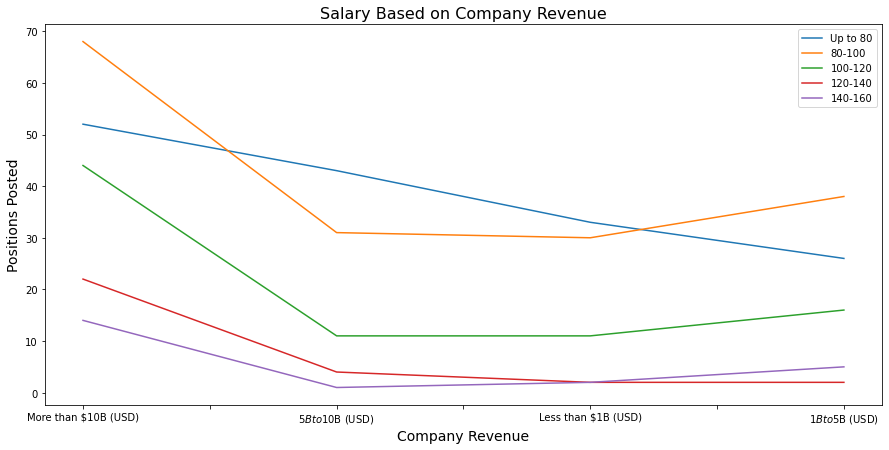

In [95]:
ax = forplot1.plot.line(rot=0, figsize=(15, 7))
plt.title("Salary Based on Company Revenue", fontsize=16)
plt.xlabel("Company Revenue", fontsize=14)
plt.ylabel("Positions Posted", fontsize=14)
plt.legend(["Up to 80", "80-100", "100-120", "120-140", "140-160"])
plt.show()